In [2]:
# %%
import pandas as pd
from pathlib import Path

# Indstil mappen hvor filerne ligger
DATA_DIR = Path(r"C:\Users\kfq6\Documents\Data")

FILES = {
    "Bookinger":  "Bookinger.xlsx",
    "LABKA":      "LABKA.xlsx",
    "Population": "Population.xlsx",
    "WHO-5 (PRO)": "WHO-5 (PRO).xlsx",
}


In [5]:
# %%
dfs = {}
for name, fname in FILES.items():
    path = DATA_DIR / fname
    df = pd.read_excel(path, sheet_name=0, engine="openpyxl")
    dfs[name] = df
    print(f"{name}: {df.shape[0]} rækker, {df.shape[1]} kolonner")


Bookinger: 207222 rækker, 24 kolonner


c:\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


LABKA: 419010 rækker, 22 kolonner
Population: 2837 rækker, 32 kolonner
WHO-5 (PRO): 4330 rækker, 7 kolonner


In [ ]:
# %%
summary_rows = []
for name, df in dfs.items():
    rows = len(df)
    cols = df.shape[1]
    unique_cpr = df["CPRNummer"].nunique(dropna=True) if "CPRNummer" in df.columns else None
    missing_cpr = df["CPRNummer"].isna().sum() if "CPRNummer" in df.columns else None
    summary_rows.append({
        "file": name,
        "rows": rows,
        "cols": cols,
        "unique_CPRNummer": unique_cpr,
        "missing_CPRNummer": missing_cpr
    })

summary = pd.DataFrame(summary_rows).sort_values("file").reset_index(drop=True)
summary


,file,rows,cols,unique_CPRNummer,missing_CPRNummer
0,Bookinger,207222,24,2823,0
1,LABKA,419010,22,2829,0
2,Population,2837,32,2837,0
3,WHO-5 (PRO),4330,7,1872,0


In [ ]:
df = dfs["LABKA"]

# Now you can safely do:
print(df.columns.tolist())  # check what the column names actually are

unique_values = df["Analysenavn"].unique()
print("Unique text values in 'Analysenavn':")
print(unique_values)

# Count how many rows for each unique analysis name
analysis_counts = df["Analysenavn"].value_counts()

print(analysis_counts)

['CPRNummer', 'DW_EK_Borger', 'DW_SK_Borger1', 'DW_SK_RekvSvar', 'ORDINV_ID', 'REQUISITION_NR', 'Alder_Proevetagningstid', 'Dato_Svartid', 'Klok_Svartid', 'Dato_Proevetagningstid', 'Klok_Proevetagningstid', 'Analysenummer', 'INVER_ID', 'Analysekode', 'Analysenavn', 'NPUKode', 'Svartype_Tekst', 'Internt_Svar_Numerisk', 'Svar', 'Enhed', 'NyesteResultatAnalyse', 'Over70']
Unique text values in 'Analysenavn':
['B-Hæmoglobin'
 'eGFR_x0020__x002F__x0020_1_x002C_73m_x00B2__x0028_CKD-EPI_x0029_'
 'P-Natrium' 'P-Kalium' 'P-Kreatinin' 'P-Triglycerid'
 'U-Albumin_x0020__x002F__x0020_Kreatinin-ratio' 'P-Kolesterol'
 'P-Kolesterol_x0020_HDL' 'P-Kolesterol_x0020_LDL' 'P-Calcium'
 'P-Calcium_x0020__x0028_albuminkorrigeret_x0029_' 'P-Albumin'
 'P-Vitamin_x0020_B12'
 'Hb_x0028_B_x0029_-Hæmoglobin_x0020_A1c_x0020__x0028_IFCC_x0029_'
 'P-25-Hydroxy-Vitamin_x0020_D_x0028_D3_x002B_D2_x0029_']
Analysenavn
P-Kreatinin                                                         49476
eGFR_x0020__x002F__x0020_1_x0

## Typer af kontakt, antal patienter under hvert kontakt

In [ ]:
df = dfs["Population"]



unique_values = df["KontaktType"].unique()
print("Unique text values in 'Analysenavn':")
print(unique_values)

# Count how many rows for each unique analysis name
analysis_counts = df["KontaktType"].value_counts()

print(analysis_counts)

Unique text values in 'Analysenavn':
['Virtuel kontakt' 'Ambulant' 'Indlæggelse']
KontaktType
Ambulant           1564
Virtuel kontakt    1261
Indlæggelse          12
Name: count, dtype: int64


## Hvilken center har ansvar for patienter

In [ ]:
df = dfs["Population"]



unique_values = df["ShakAfdKodeTekst_KontaktAnsvar"].unique()
print("Unique text values in 'Analysenavn':")
print(unique_values)

# Count how many rows for each unique analysis name
analysis_counts = df["ShakAfdKodeTekst_KontaktAnsvar"].value_counts()

print(analysis_counts)

Unique text values in 'Analysenavn':
['800109 - Alb Endokrinologisk Område']
ShakAfdKodeTekst_KontaktAnsvar
800109 - Alb Endokrinologisk Område    2837
Name: count, dtype: int64


## type af diagnose

In [ ]:
df = dfs["Population"]



unique_values = df["Aktionsdiagnosegruppe"].unique()
print("Unique text values in 'Analysenavn':")
print(unique_values)

# Count how many rows for each unique analysis name
analysis_counts = df["Aktionsdiagnosegruppe"].value_counts()

print(analysis_counts)

Unique text values in 'Analysenavn':
['Type 2-diabetes' 'Type 1-diabetes' 'Andre former for diabetes'
 'Ikke specificeret diabetes']
Aktionsdiagnosegruppe
Type 1-diabetes               1923
Type 2-diabetes                793
Andre former for diabetes       89
Ikke specificeret diabetes      32
Name: count, dtype: int64


In [7]:
#============================================================
# ===  POPULATION ============================================
# ============================================================
pop = dfs["Population"]
print("\n=== POPULATION ===")
print(pop.info())
print(pop.describe(include="all").T.head())




=== POPULATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DW_SK_Kontakt                   2837 non-null   int64         
 1   DW_SK_Forloeb                   2837 non-null   int64         
 2   DW_SK_Helbredsforloeb           2837 non-null   int64         
 3   Encounter_ID                    2837 non-null   int64         
 4   CPRNummer                       2837 non-null   int64         
 5   DW_EK_Borger                    2837 non-null   int64         
 6   DW_SK_Borger                    2837 non-null   int64         
 7   Alder_KontaktStart              2837 non-null   int64         
 8   Dato_ForloebStart               2837 non-null   datetime64[ns]
 9   Dato_ForloebSlut                0 non-null      float64       
 10  Dato_KontaktStart               2837 non-null   date

In [8]:
# ---- Time coverage
for c in ["Dato_ForloebStart","Dato_ForloebSlut","Dato_KontaktStart","Dato_KontaktSlut"]:
    if c in pop.columns:
        pop[c] = pd.to_datetime(pop[c], errors="coerce")
        print(f"{c}: {pop[c].min()}  →  {pop[c].max()}")

Dato_ForloebStart: 2022-03-25 00:00:00  →  2025-10-18 00:00:00
Dato_ForloebSlut: NaT  →  NaT
Dato_KontaktStart: 2022-03-30 00:00:00  →  2025-10-21 00:00:00
Dato_KontaktSlut: 2022-03-30 00:00:00  →  2025-10-21 00:00:00


In [25]:
bookings_per_patient = book["DW_EK_Borger"].value_counts()
print(bookings_per_patient.describe())

# # how many bookings per year (optional)
# book["Dato_MoedeDato"] = pd.to_datetime(book["Dato_MoedeDato"], errors="coerce")
# book["year"] = book["Dato_MoedeDato"].dt.year
# bookings_per_year = book.groupby("year")["DW_EK_Borger"].nunique()
# print(bookings_per_year)

count    2823.000000
mean       73.404888
std        59.873840
min         1.000000
25%        42.000000
50%        58.000000
75%        86.000000
max       779.000000
Name: count, dtype: float64


## How many contacts did each patient had 

In [26]:
# Normalize text (just in case there are weird capitalizations or spaces)
book["BookingStatusTekst"] = book["BookingStatusTekst"].astype(str).str.strip().str.lower()

# Keep only relevant statuses
valid_statuses = ["afviklet", "booket"]
book_filtered = book[book["BookingStatusTekst"].isin(valid_statuses)].copy()

print(f"Original bookings: {len(book)}")
print(f"After filtering (Afviklet/Booket): {len(book_filtered)}")

# Count bookings per patient
bookings_per_patient = book_filtered["DW_EK_Borger"].value_counts()
print(bookings_per_patient.describe())


Original bookings: 207222
After filtering (Afviklet/Booket): 137220
count    2821.000000
mean       48.642325
std        48.856862
min         1.000000
25%        23.000000
50%        35.000000
75%        59.000000
max       591.000000
Name: count, dtype: float64


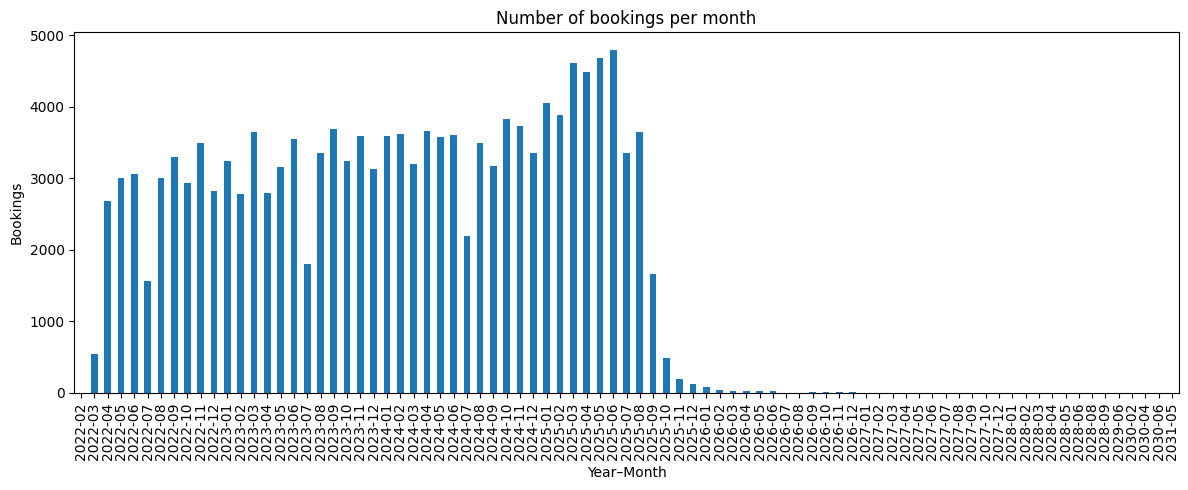

In [19]:
import matplotlib.pyplot as plt

# make sure date is parsed
book["Dato_MoedeDato"] = pd.to_datetime(book["Dato_MoedeDato"], errors="coerce")

# group by month for a smoother view
book["year_month"] = book["Dato_MoedeDato"].dt.to_period("M")

counts = book["year_month"].value_counts().sort_index()

plt.figure(figsize=(12,5))
counts.plot(kind="bar")
plt.title("Number of bookings per month")
plt.xlabel("Year–Month")
plt.ylabel("Bookings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
# Filter bookings beyond 2025
future_bookings = book[book["year"] > 2025][
    ["DW_EK_Borger", "Dato_MoedeDato", "BookingStatusTekst"]
]

# Sort descending (furthest in the future first)
future_bookings = future_bookings.sort_values("Dato_MoedeDato", ascending=False)

print(future_bookings.head(20))  # show the first 20 most futuristic bookings


        DW_EK_Borger Dato_MoedeDato BookingStatusTekst
21254         563409     2031-05-01             Booket
21255        1077998     2031-05-01             Booket
192318        527558     2030-06-03             Aflyst
196447       1559031     2030-04-01             Booket
122555        156172     2030-02-08             Aflyst
159872        968115     2029-06-01             Aflyst
21253         380414     2028-09-08             Booket
97349         679669     2028-08-31             Booket
86026        1276811     2028-08-31             Aflyst
206726       1107738     2028-06-20             Booket
197818        354675     2028-05-16             Aflyst
192549        303308     2028-04-19             Booket
188286        457511     2028-04-11             Aflyst
189285        534712     2028-04-11             Aflyst
184479        662579     2028-03-14             Aflyst
184476       1255369     2028-03-14             Aflyst
21258         574135     2028-02-04             Booket
107171    

In [27]:
book["BookingStatusTekst"].value_counts()


BookingStatusTekst
afviklet      125452
slettet        33438
aflyst         25313
booket         11768
huskeliste     11152
anmodet           80
genbooking        19
Name: count, dtype: int64

In [28]:
book_filtered["Dato_MoedeDato"] = pd.to_datetime(book_filtered["Dato_MoedeDato"], errors="coerce")
book_filtered["year"] = book_filtered["Dato_MoedeDato"].dt.year
book_filtered["year"].value_counts().sort_index()


year
2022    26408
2023    37968
2024    40965
2025    31633
2026      220
2027       17
2028        6
2030        1
2031        2
Name: count, dtype: int64